In [6]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install sklearn

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
def create_model():
  # Create a multilayer perceptron
  model = Sequential()
  model.add(Input((22,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [0]:
df = pd.read_csv("data.csv")
labels = df["status"]
df = df.drop(columns="status")
df[df.columns] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[df.columns])

In [0]:
seed = 1337
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.2, random_state=seed)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=seed)

In [11]:
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=1000, callbacks=[early_stopping])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 117 samples, validate on 39 samples
Epoch 1/1000
117/117 [==============================] - 0s 3ms/sample - loss: 0.6382 - acc: 0.7350 - val_loss: 0.5933 - val_acc: 0.7692
Epoch 2/1000
117/117 [==============================] - 0s 128us/sample - loss: 0.5908 - acc: 0.7436 - val_loss: 0.5560 - val_acc: 0.7692
Epoch 3/1000
117/117 [==============================] - 0s 117us/sample - loss: 0.5537 - acc: 0.7436 - val_loss: 0.5286 - val_acc: 0.7692
Epoch 4/1000
117/117 [==============================] - 0s 112us/sample - loss: 0.5272 - acc: 0.7436 - val_loss: 0.5089 - val_acc: 0.7692
Epoch 5/1000
117/117 [==============================] - 0s 121us/sample - loss: 0.5086 - acc: 0.7436 - val_loss: 0.4951 - val_acc: 0.7692
Epoch 6/1000
117/117 [==============================] - 0s 114us/sample - loss: 0.4938 - acc

In [12]:
model.evaluate(X_test, Y_test)

39/39 [==============================] - 0s 122us/sample - loss: 0.1506 - acc: 0.9487


[0.1505679427049099, 0.94871795]

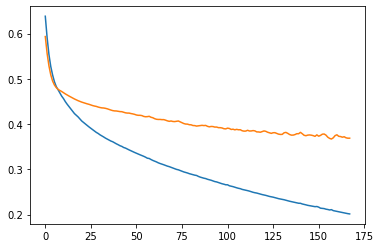

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

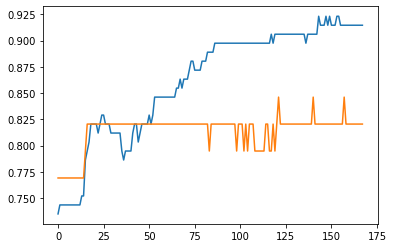

In [14]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

In [0]:
model.save("model.h5")

In [0]:
from google.colab import files
files.download('model.h5') 